In [1]:
import en_core_web_sm
nlp = en_core_web_sm.load()

/home/chris/anaconda3/lib/python3.7/site-packages/spacy/util.py:271: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [2]:
import pandas as pd

df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')
facebook_fake = pd.read_csv('facebook-fact-check.csv')

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
facebook_fake.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [5]:
df_true.shape, df_fake.shape,facebook_fake.shape

((21417, 4), (23481, 4), (2282, 12))

In [6]:
df_true['class']=1
df_fake['class']=0

We merge our 2 datasets of real news and fake news with a new feature depicting which news is real news and which are fake

In [7]:
merged_df = pd.concat([df_true,df_fake])

In [8]:
merged_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


After the merge we want to check the features to see if any contain NaN which can throw our model off below we can see there are no NaN within our dataset

In [9]:
merged_df.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

After the merge we need to check the balance between our dataset between real and fake, because if one is significantly larger than the other we can overfit to our data

/home/chris/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

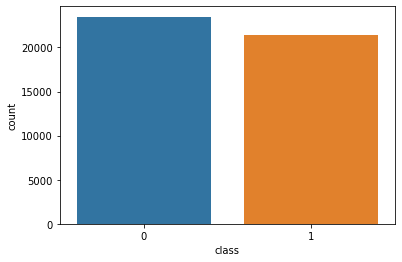

In [10]:
import seaborn as sns
sns.countplot(merged_df['class'])

In [11]:
sample_news_df = merged_df.sample(10000, random_state=786).reset_index(drop=True)
sample_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10000 non-null  object
 1   text     10000 non-null  object
 2   subject  10000 non-null  object
 3   date     10000 non-null  object
 4   class    10000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


We would now need to initilize the training environment that creates teh transformation pipline. This setup needs to be called before we train or execute and function 

In [12]:
sample_news_df.head()

,title,text,subject,date,class
0,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0
2,"Buoyed by mayoral votes, Venezuela socialists ...",CARACAS (Reuters) - President Nicolas Maduro h...,worldnews,"December 10, 2017",1
3,Oklahoma lawmaker apologizes for linking Nativ...,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",politicsNews,"April 28, 2016",1
4,Argentine mid-term campaign pauses after body ...,BUENOS AIRES (Reuters) - Major parties running...,worldnews,"October 18, 2017",1


In [13]:
from pycaret.nlp import *

news_nlp = setup(data = sample_news_df, target = 'text', session_id =123)

Description,Value
session_id,123
Documents,10000
Vocab Size,35185
Custom Stopwords,False


In [14]:
%time
lda = create_model('lda',multi_core=True)

In [15]:
%time
lda_df = assign_model(lda)

In [16]:
plot_model(lda, plot = 'topic_distribution')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



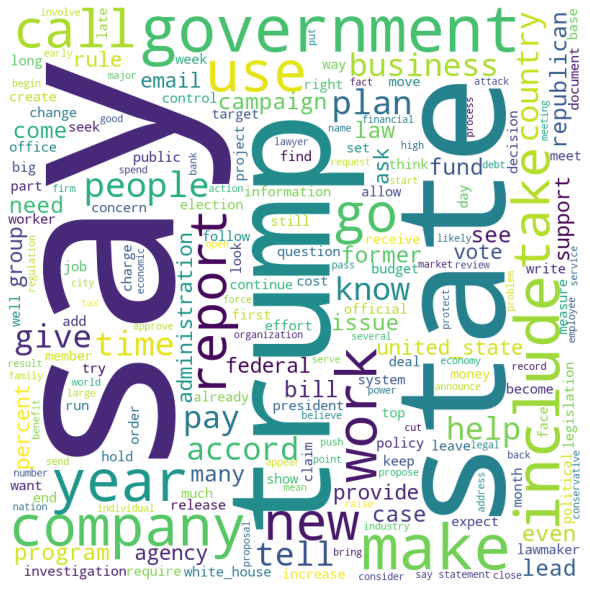

In [17]:
plot_model(lda, plot = 'wordcloud')

In [18]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.160260  0.060680       1        1  33.939748
2      0.053544  0.124316       2        1  24.459031
0      0.147870 -0.032079       3        1  22.686166
1     -0.041154 -0.152916       4        1  18.915054, topic_info=          Term          Freq         Total Category  logprob  loglift
80         say  36919.000000  36919.000000  Default  30.0000  30.0000
493     police   2396.000000   2396.000000  Default  29.0000  29.0000
557      trump  12163.000000  12163.000000  Default  28.0000  28.0000
163   election   5251.000000   5251.000000  Default  27.0000  27.0000
1296   company   2011.000000   2011.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
315    include   1058.328694   4551.403835   Topic4  -5.6109   0.2065
227   official   1043.555759   4418.535514   Topic4  -5.6249   0.2220
90        take   1058.723783   6738.722747   Topic4  -5.6105  -0.1856
99         use    949.277583   4261.174473   Topic4  -5.7196   0.1636
124       call    873.180003   5334.316777   Topic4  -5.8032  -0.1446

[392 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
425       1  0.168039    accord
425       2  0.185536    accord
425       3  0.374373    accord
425       4  0.272361    accord
2         1  0.901448  actually
...     ...       ...       ...
2709      4  0.931950     wound
292       1  0.198296      year
292       2  0.257703      year
292       3  0.322333      year
292       4  0.221798      year

[799 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [19]:
plot_model(lda, plot = 'bigram')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



After the observations of these models we need to create the dataframe the model will be learning off of. In this case we just want the models to be learning of whether or not the data row is a truthful article or fake any other additional information would be unnecessary data that will just confuse the model especially since the other data types are text based data while our class indicator is only 0 and 1

In [20]:
lda_df.drop(['text','title','subject','date'],axis = 1, inplace=True, errors='ignore')

In [21]:
from pycaret.classification import *

%time
setup(data=lda_df, target='class', silent = True)

,Description,Value
0,session_id,7273
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


('lightgbm',
 5,
 [],
 False,
 False,
 {'acc': <pycaret.containers.metrics.classification.AccuracyMetricContainer at 0x7fed4f467c50>,
  'auc': <pycaret.containers.metrics.classification.ROCAUCMetricContainer at 0x7fed4f467cd0>,
  'recall': <pycaret.containers.metrics.classification.RecallMetricContainer at 0x7fed4f467e50>,
  'precision': <pycaret.containers.metrics.classification.PrecisionMetricContainer at 0x7fed4f467090>,
  'f1': <pycaret.containers.metrics.classification.F1MetricContainer at 0x7fed4f4675d0>,
  'kappa': <pycaret.containers.metrics.classification.KappaMetricContainer at 0x7fed4f467f50>,
  'mcc': <pycaret.containers.metrics.classification.MCCMetricContainer at 0x7fed4f477250>},
 <MLUsecase.CLASSIFICATION: 1>,
        Topic_0   Topic_1   Topic_2   Topic_3  Perc_Dominant_Topic  \
 0     0.020044  0.002238  0.236101  0.741617                 0.74   
 1     0.250000  0.250000  0.250000  0.250000                 0.25   
 2     0.000917  0.051859  0.889862  0.057361         

In [27]:
%time

top5Models = compare_models(sort= 'Accuracy', n_select = 16)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8908,0.9546,0.8837,0.8866,0.8851,0.7811,0.7813,0.2120
lightgbm,Light Gradient Boosting Machine,0.8904,0.9534,0.8804,0.8884,0.8843,0.7802,0.7804,0.0820
ada,Ada Boost Classifier,0.8898,0.9515,0.8762,0.8908,0.8833,0.7790,0.7794,0.0770
catboost,CatBoost Classifier,0.8898,0.9551,0.8801,0.8876,0.8837,0.7791,0.7794,2.1750
xgboost,Extreme Gradient Boosting,0.8881,0.9510,0.8804,0.8842,0.8822,0.7757,0.7759,26.7100
rf,Random Forest Classifier,0.8877,0.9505,0.8750,0.8876,0.8811,0.7747,0.7749,0.3280
lr,Logistic Regression,0.8837,0.9468,0.8804,0.8758,0.8780,0.7669,0.7670,0.2970
svm,SVM - Linear Kernel,0.8807,0.0000,0.8687,0.8797,0.8739,0.7607,0.7612,0.0100
et,Extra Trees Classifier,0.8778,0.9458,0.8639,0.8776,0.8706,0.7549,0.7552,0.2390
lda,Linear Discriminant Analysis,0.8764,0.9428,0.8801,0.8628,0.8713,0.7525,0.7527,0.0090


Using pycaret's compare_model function we are easily able to observe how accurate different models are with the data frame we set up in the cell above and see different metrics each of the models have. We can use this to observe the results vs having to train different models in separate lines.

In [28]:
predict_model(top5Models[0],data=lda_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8999,0.9621,0.8993,0.8916,0.8954,0.7994,0.7995


,class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic,Label,Score
0,0,0.020044,0.002238,0.236101,0.741617,Topic 3,0.74,0,0.9503
1,0,0.250000,0.250000,0.250000,0.250000,Topic 0,0.25,0,0.9649
2,1,0.000917,0.051859,0.889862,0.057361,Topic 2,0.89,1,0.9619
3,1,0.233389,0.493758,0.003294,0.269559,Topic 1,0.49,0,0.9247
4,1,0.038873,0.399176,0.560102,0.001849,Topic 2,0.56,1,0.9461
...,...,...,...,...,...,...,...,...,...
9995,0,0.089257,0.295777,0.155449,0.459516,Topic 3,0.46,0,0.8693
9996,0,0.807085,0.041173,0.001640,0.150102,Topic 0,0.81,0,0.8280
9997,0,0.327024,0.001621,0.001551,0.669803,Topic 3,0.67,0,0.9686
9998,1,0.002496,0.934884,0.060132,0.002488,Topic 1,0.93,1,0.9166


In [29]:
predict_model(top5Models[5])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8840,0.9479,0.8790,0.8790,0.8790,0.7677,0.7677


,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,class,Label,Score
0,0.001475,0.072200,0.001462,0.924864,0.92,0.0,0.0,0.0,1.0,0,0,1.00
1,0.005139,0.155132,0.004864,0.834865,0.83,0.0,0.0,0.0,1.0,0,0,0.98
2,0.017235,0.450585,0.017029,0.515150,0.52,0.0,0.0,0.0,1.0,0,0,1.00
3,0.001326,0.455374,0.541996,0.001304,0.54,0.0,0.0,1.0,0.0,1,1,1.00
4,0.250000,0.250000,0.250000,0.250000,0.25,1.0,0.0,0.0,0.0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.002324,0.002293,0.176510,0.818872,0.82,0.0,0.0,0.0,1.0,0,0,0.75
2997,0.081120,0.002945,0.271840,0.644096,0.64,0.0,0.0,0.0,1.0,0,0,0.64
2998,0.038758,0.003850,0.452134,0.505257,0.51,0.0,0.0,0.0,1.0,0,1,0.53
2999,0.399562,0.012722,0.574517,0.013199,0.57,0.0,0.0,1.0,0.0,1,1,1.00


In [30]:
predict_model(top5Models[6])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8834,0.9432,0.8901,0.8696,0.8797,0.7666,0.7668


,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,class,Label,Score
0,0.001475,0.072200,0.001462,0.924864,0.92,0.0,0.0,0.0,1.0,0,0,0.9898
1,0.005139,0.155132,0.004864,0.834865,0.83,0.0,0.0,0.0,1.0,0,0,0.9843
2,0.017235,0.450585,0.017029,0.515150,0.52,0.0,0.0,0.0,1.0,0,0,0.9268
3,0.001326,0.455374,0.541996,0.001304,0.54,0.0,0.0,1.0,0.0,1,1,0.9059
4,0.250000,0.250000,0.250000,0.250000,0.25,1.0,0.0,0.0,0.0,0,0,0.7540
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.002324,0.002293,0.176510,0.818872,0.82,0.0,0.0,0.0,1.0,0,0,0.9598
2997,0.081120,0.002945,0.271840,0.644096,0.64,0.0,0.0,0.0,1.0,0,0,0.8545
2998,0.038758,0.003850,0.452134,0.505257,0.51,0.0,0.0,0.0,1.0,0,0,0.5583
2999,0.399562,0.012722,0.574517,0.013199,0.57,0.0,0.0,1.0,0.0,1,1,0.9503


/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.

/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analy

/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.

In [31]:
best = compare_models(include = ['lr','dt','knn','dummy','rf','nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8877,0.9505,0.8750,0.8876,0.8811,0.7747,0.7749,0.3170
lr,Logistic Regression,0.8837,0.9468,0.8804,0.8758,0.8780,0.7669,0.7670,0.2930
knn,K Neighbors Classifier,0.8740,0.9293,0.8624,0.8715,0.8668,0.7472,0.7474,0.0610
dt,Decision Tree Classifier,0.8474,0.8466,0.8305,0.8462,0.8382,0.6938,0.6941,0.0150
nb,Naive Bayes,0.8317,0.9254,0.9354,0.7640,0.8410,0.6661,0.6816,0.0070
dummy,Dummy Classifier,0.5245,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070


/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/chris/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
